# 遗传算法

### 流程图
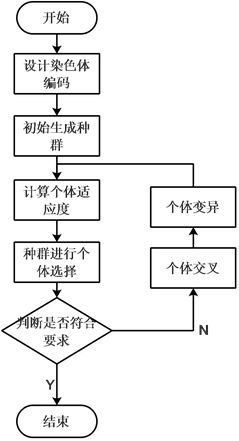

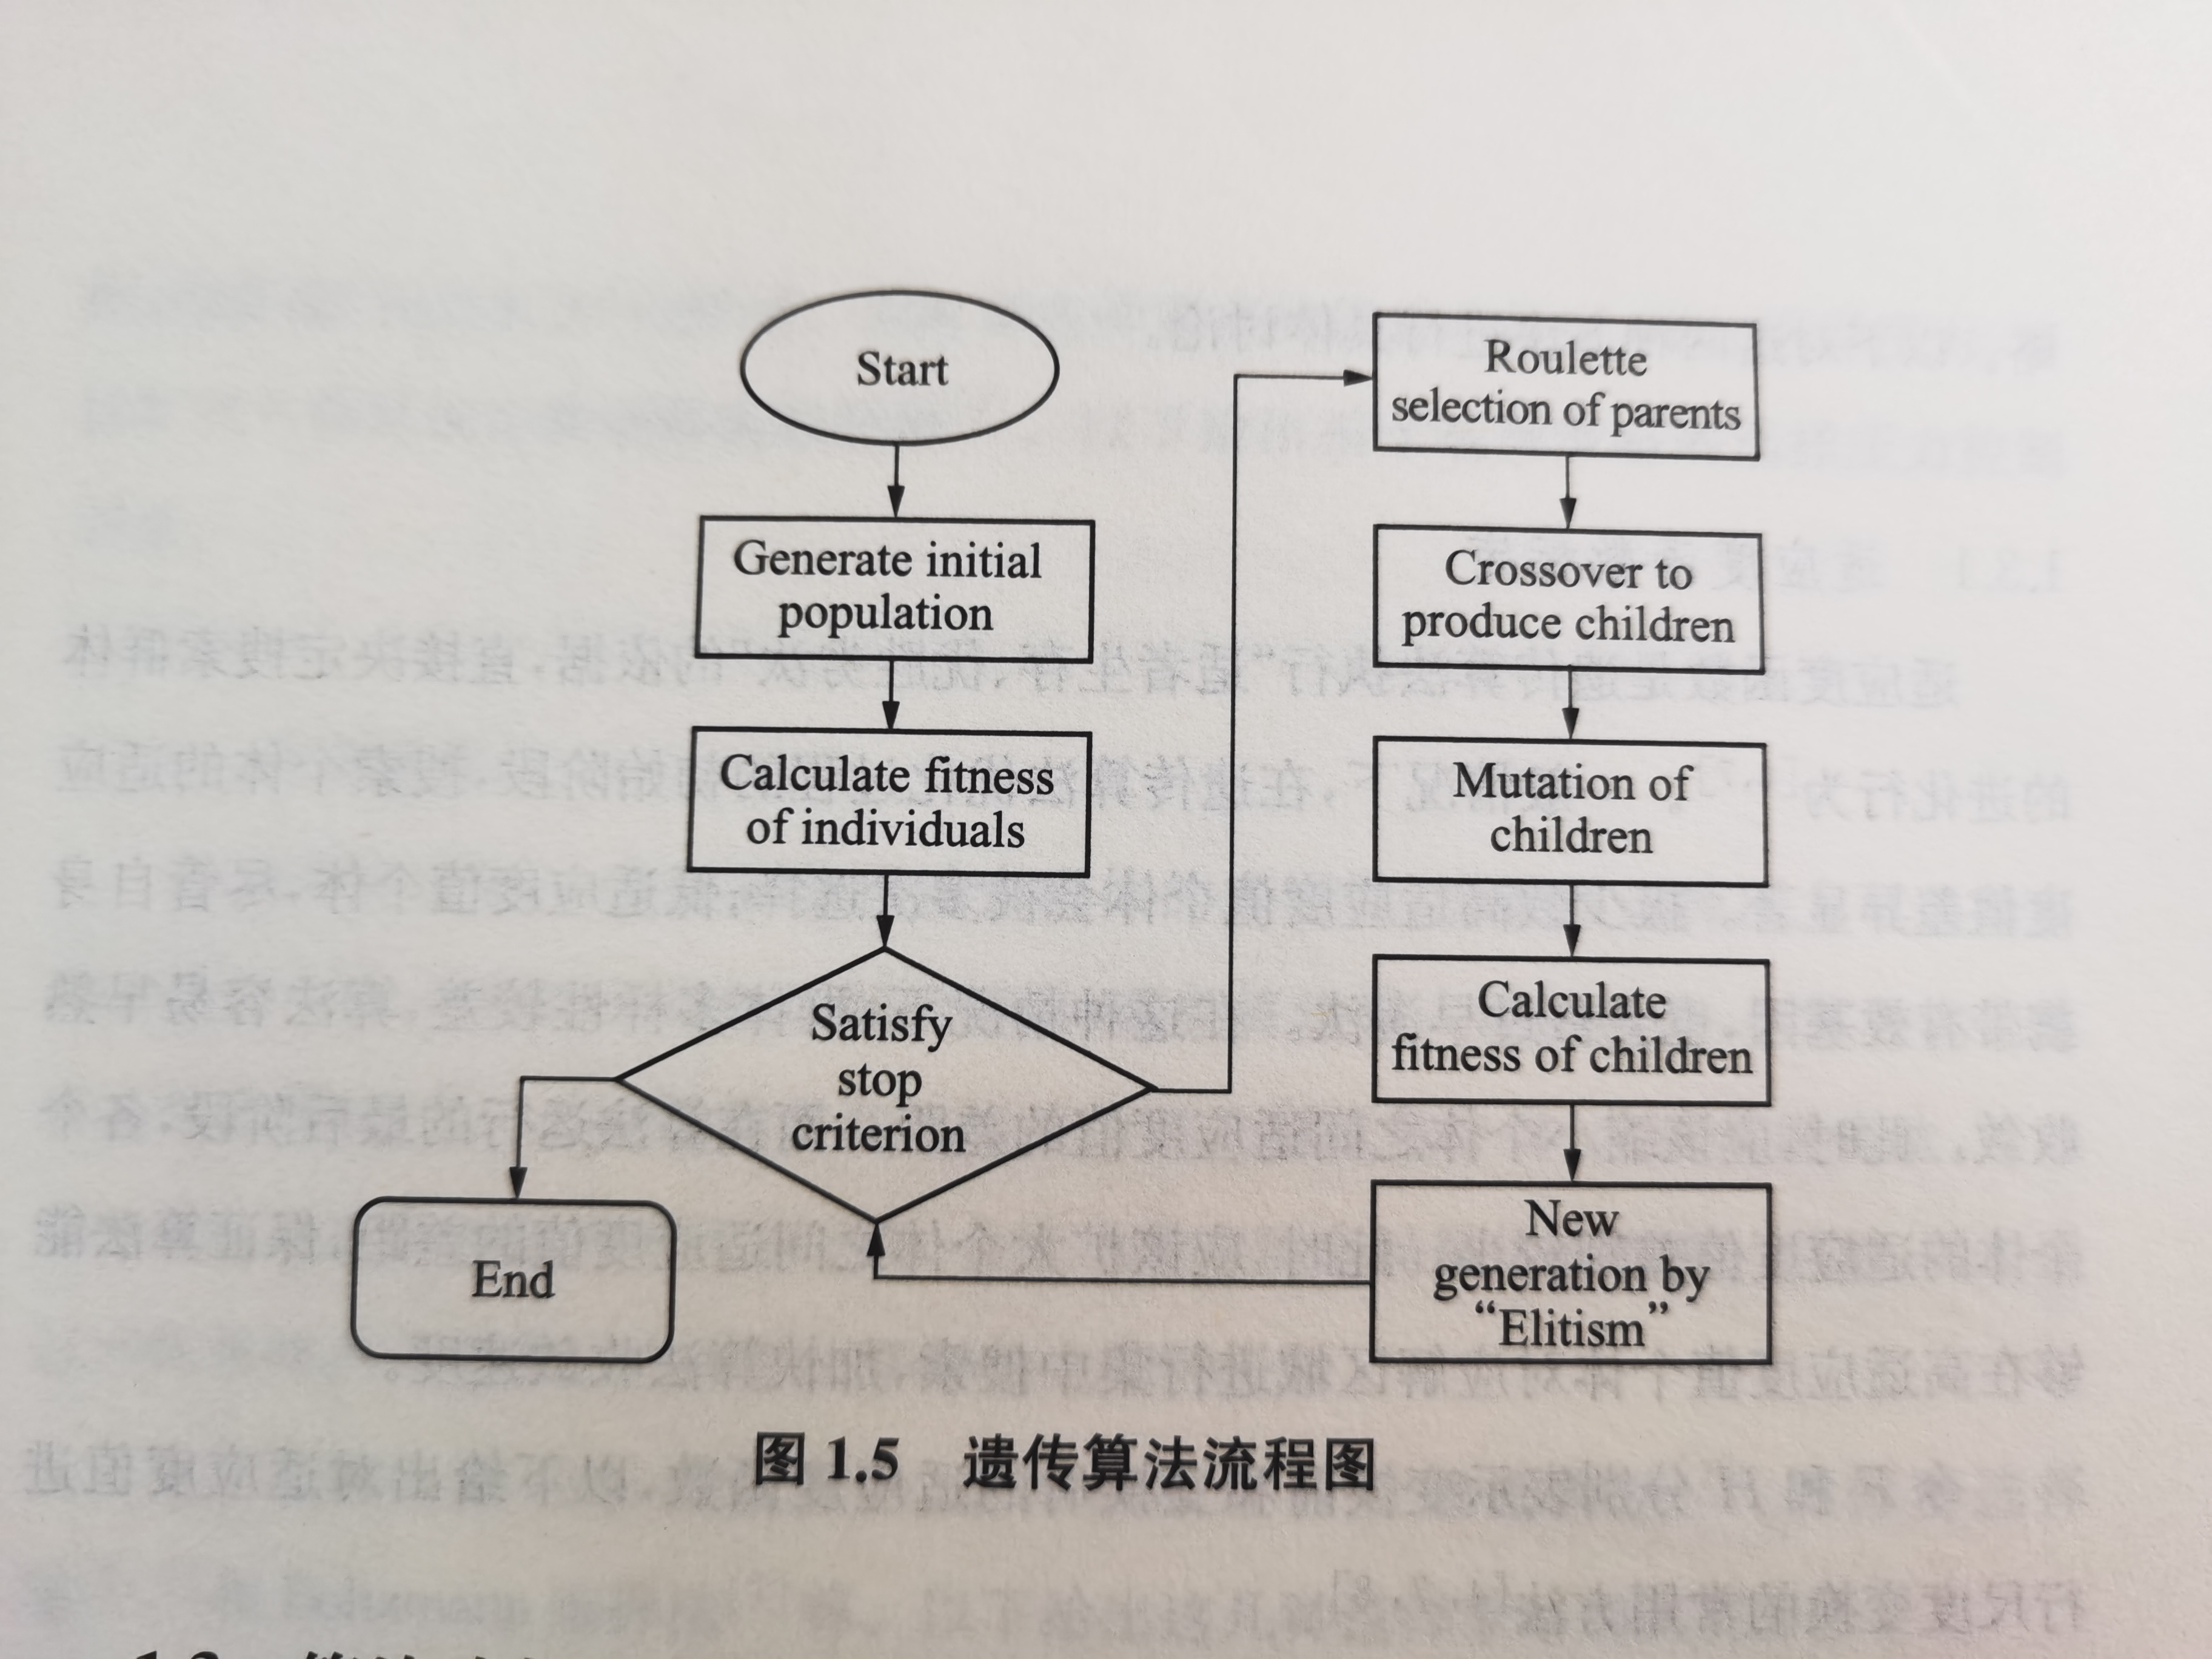

### 步骤
1. 初始化种群(Initialization)：

随机生成一组初始解，称为种群。每个个体（解）通常用一个染色体表示，染色体可以是二进制串、实数向量或其他形式。
2. 适应度评估(Fitness Evaluation)：

计算每个个体的适应度（fitness），适应度是衡量个体解决问题效果的指标，通常由一个目标函数来定义。
选择（Selection）：

根据适应度选择父代个体，以生成下一代。选择方法有多种，如轮盘赌选择（Roulette Wheel Selection）、锦标赛选择（Tournament Selection）等。霍兰德推荐使用轮盘赌算法。

3. 交叉（Crossover）：

选择的父代个体通过交叉操作生成新的后代个体。交叉操作模拟生物遗传过程中的基因重组，常用的方法有单点交叉、两点交叉和均匀交叉。    
不是一定会发生交叉，而是有一定概率发生交叉  
**交叉概率一般取0.8**  

4. 变异(Mutation)：

对后代个体进行变异操作，模拟基因突变的过程，增加种群的多样性。变异操作通常以较低的概率随机改变个体的一个或多个基因。  
**变异概率一般取0.005**

5. 适应度评估(Fitness Evaluation)：

计算新生成个体的适应度。

6. 选择(Selection)：

根据适应度选择个体进入下一代种群。  
**这里建议采用精英保留策略**  
Rudolph通过马尔可夫链相关理论证明仅采用选择、交叉和变异三种进化操作的遗传算法不能收敛到全局最优值。而采用精英保留策略,将对基本遗传算法的全局收敛能力产生重要影响。Rudolph已经从理论上证明了采用精英保留策略的遗传算法是全局收敛的。当然精英保留策略同样可以应用于其他智能优化算法。

7. 终止条件(Termination Condition)：

检查是否满足终止条件。如果满足（例如达到最大迭代次数或找到满意的解），算法终止；否则，返回步骤3继续迭代。

In [ ]:
#整数编码

import random
import numpy as np

# 定义个体类，代表种群中的一个个体
class Individual:
    def __init__(self, genes):
        self.genes = genes  # 个体的基因序列
        self.fitness = self.calculate_fitness()  # 个体的适应度
    # 计算适应度函数
    def calculate_fitness(self):
        
        return  sum(np.cos(x)**2/(np.sin(abs(x))+10e-2) for x in self.genes)


# 以下在类的定义之外

# 初始化种群
def initialize_population(size, gene_length):

    ''' size: 种群的大小
        gene_length: 个体基因序列的长度
        生成初始种群，每个个体由随机生成的基因序列组成'''

    # 此处为整数编码，每一个染色体为一个解向量，改为二进制编码
    return [Individual([random.randint(-10, 10) for _ in range(gene_length)]) for _ in range(size)]

# 选择过程
def selection(population, num_parents):

    ''' 根据适应度排序，选择适应度高的个体作为父母
        population: 当前种群
        num_parents: 定义选择的父母数量'''
    
    sorted_population = sorted(population, key=lambda x: x.fitness, reverse=True)
    return sorted_population[:num_parents]

# (单点)交叉过程
def crossover(parent1, parent2):

    # 随机选择交叉点，交换父本基因，生成两个子代，避免无效交叉
    point = random.randint(1, len(parent1.genes) - 1)
    child1_genes = parent1.genes[:point] + parent2.genes[point:]
    child2_genes = parent2.genes[:point] + parent1.genes[point:]
    return Individual(child1_genes), Individual(child2_genes)

# 变异过程
def mutation(individual, mutation_rate=0.05):

    ''' 对个体的基因序列进行随机变异
        individual: 要变异的个体，对子代变异？亲本不变异？
        mutation_rate: 变异概率 '''
    
    for i in range(len(individual.genes)):
        if random.random() < mutation_rate:
            # 对每个基因位以一定的概率进行增减操作

            # 一种变异操作，改为二进制的变异方法
            individual.genes[i] += random.randint(-1, 1)
    # 更新个体的适应度
    individual.fitness = individual.calculate_fitness()

# 遗传算法主函数
def genetic_algorithm(population_size, gene_length, num_generations):
    
    ''' population_size: 种群大小
        gene_length: 基因长度
        num_generations: 迭代次数'''
    
    # 初始化种群
    population = initialize_population(population_size, gene_length)
    for i in range(num_generations):
        # 选择
        parents = selection(population, population_size // 2)
        next_generation = []
        # 生成新一代
        while len(next_generation) < population_size:
            parent1, parent2 = random.sample(parents, 2)
            child1, child2 = crossover(parent1, parent2)
            mutation(child1)
            mutation(child2)
            next_generation.extend([child1, child2])
        population = next_generation
        # 每一代选出适应度最高的个体
        best_individual = max(population, key=lambda x: x.fitness)
        print(f"第{i+1}代的最优适应度: {best_individual.fitness}")
    
    return best_individual

# 运行算法
best = genetic_algorithm(100, 5, 50)
print(f"最优个体基因: {best.genes}")

In [ ]:
# 二进制 二元函数最值 轮盘赌 精英选择策略

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm 
from mpl_toolkits.mplot3d import Axes3D
import random


# 初始化
DNA_SIZE = 24
POP_SIZE = 200
CROSSOVER_RATE = 0.8
MUTATION_RATE = 0.005
X_BOUND = [-3, 3]
Y_BOUND = [-3, 3]
N_GENERATIONS = 200

# 目标函数
def F(x, y):
    return 3 * (1 - x) ** 2 * np.exp(-(x ** 2) - (y + 1) ** 2) - 10 * (x / 5 - x ** 3 - y ** 5) * np.exp(
        -x ** 2 - y ** 2) - 1 / 3 ** np.exp(-(x + 1) ** 2 - y ** 2)


# 解码
def translateDNA(pop):

    x_pop = pop[:, 1::2]
    y_pop = pop[:, 0::2]

    x = x_pop.dot(2 ** np.arange(DNA_SIZE)[::-1]) / float(2 ** DNA_SIZE -1) * (X_BOUND[1]-X_BOUND[0]) + X_BOUND[0]
    y = y_pop.dot(2 ** np.arange(DNA_SIZE)[::-1]) / float(2 ** DNA_SIZE -1) * (Y_BOUND[1]-Y_BOUND[0]) + Y_BOUND[0]

    return x, y

# 适应度函数
def get_fitness(pop):
    x, y = translateDNA(pop)
    pred = F(x, y)
    return pred - np.min(pred) + 1e-3

# 轮盘赌
def idx():
    fitness = get_fitness(pop)
    cumulative_p = 0
    sum_fitness = np.sum(fitness)
    r = random.random()
    for i in range(POP_SIZE):
        cumulative_p += fitness[i] / sum_fitness
        if cumulative_p >= r:
            return i
        else:
            continue



# 交叉
def crossover(pop):
    tem_pop = []

    for _ in range(int(POP_SIZE/2)):
        idx1 = idx()
        idx2 = idx()
        father = pop[idx1]
        mother = pop[idx2]

        crossover_p = np.random.rand()
        if crossover_p < CROSSOVER_RATE:
            point = random.randint(1, (DNA_SIZE * 2) - 1)
            child1 = np.concatenate((father[:point], mother[point:]),axis=0)
            child2 = np.concatenate((mother[:point], father[point:]),axis=0)
   
        else:
            child1 = father
            child2 = mother

        tem_pop.append(child1)
        tem_pop.append(child2)

    tem_pop = np.array(tem_pop)

    return tem_pop

# 变异
def mutation(tem_pop):
    for i in range(POP_SIZE):
        mutation_p = np.random.rand()
        if mutation_p < MUTATION_RATE:
            mutate_point = np.random.randint(0, DNA_SIZE * 2)
            # 反转
            tem_pop[i][mutate_point] = tem_pop[i][mutate_point] ^ 1


# 精英保留策略
def select(pop, tem_pop):

    fitness1 = get_fitness(pop)
    top_10_indices = np.argsort(fitness1)[-10:][::-1]
    elite = np.array([pop[i] for i in top_10_indices])

    fitness2 = get_fitness(tem_pop)
    worst_10_indices = np.argsort(fitness2)[:10]

    for i, idx in enumerate(worst_10_indices):
        tem_pop[idx] = elite[i]
    
    pop[:] = tem_pop
    
    return pop


def GA(pop):
    fitness = get_fitness(pop)
    max_fitness_index = np.argmax(fitness)
    print('max fitness:',fitness[max_fitness_index])
    x, y =translateDNA(pop)
    print('最优基因型：', pop[max_fitness_index])
    print('(x, y):',x[max_fitness_index], y[max_fitness_index])


# 绘图
def plot_3d(ax):

    X = np.linspace(*X_BOUND, 100)
    Y = np.linspace(*Y_BOUND, 100)
    X, Y = np.meshgrid(X, Y)

    Z = F(X, Y)
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm)

    ax.set_zlim(-10, 10)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    plt.pause(3)
    plt.show()



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.ion()
plot_3d(ax)

# 迭代 

pop = np.random.randint(0,2, size=(POP_SIZE, DNA_SIZE * 2))

for _ in range(N_GENERATIONS):
    # 将二进制化为十进制 绘制动态图
    x, y = translateDNA(pop)
    if 'sca' in locals():
        sca.remove()
    sca = ax.scatter(x, y, F(x, y), c='black', marker='o')
    plt.show()
    plt.pause(0.1)

    tem_pop = crossover(pop)
    pop = select(pop, tem_pop)



GA(pop)
# 非交互式
plt.ioff()

### 参考资料
<https://blog.csdn.net/2301_80232843/article/details/134406561>  
http://t.csdnimg.cn/SiRpO  
<https://blog.csdn.net/ha_ha_ha233/article/details/91364937>